# A Data Oriented View of Pokemon Size Over Time

## Overview and Premise
For a great deal of people, millions even, childhood consisted of a period of time where we collected Pokemon cards and rushed home from school to watch the animated cartoon of Ash's adventures to become a Pokemon master.  Since the first Pokemon's release into the wilds, there's been quite a few additions.  As of July 2023, there are 1,015 Pokemon in total!  Watching my daughter take up Pokemon was inspiring- to see her so quickly master the names and types of Pokemon sparked a question in my head: how do the different generations of Pokemon compare to each other?  Have they gotten larger in height or weight?  How does the balance look in terms of health points and attack stats across generations?  With those questions buzzing about, I started doing what I do best- finding data and turning it into insights.

## TL;DR
I looked at the heights and weights of Pokemon in this exercise in an effort to determine if Pokemon were getting larger overall or if they had stayed relatively the same size.  The analysis showed that while Generations 1, 5, and 6 hosted Pokemon of similar weights the height of Pokemon in Generations 1, 2, 3, 4, 5, and 6 were fairly consistent with each other.  However, for the most recent Generations of 7, 8, and 9, Pokemon have been both heavier and taller in stature.  The question will be if this trend will continue with ever-larger Pokemon or if we'll see more smaller Pokemon in the following Generations.


## Sourcing Data
The Pokemon data used in this analysis is sourced via the [PokeAPI](https://pokeapi.co/).  To obtain the data from the API, I built a lighweight Python script that fetches the core metadata I wanted to analyze and stores the resulting data in an output file.  You can check out this script in my GitHub repo, [here](https://github.com/NyanCatMeepMeep/pokemon_generation_analysis/blob/main/pull_pokemon_metadata.py).

A secondary source of data I wanted to have was the generations of Pokemon and what their pokemon number ranges were.  To do this I used the data from [Bulbapedia] (https://bulbapedia.bulbagarden.net/wiki/Generation) and created a static values set to be used.  That data can be found under the `populate_pokemon_generation_values` function in the [table_management.py utility script](https://github.com/NyanCatMeepMeep/pokemon_generation_analysis/blob/main/utilities/table_management.py)


## Storing Data For Use
I chose to capture and store the data from the PokeAPI into an output file at each run so that I wouldn't need to ping the API more than necessary.  This file is then uploaded into a BigQuery table under my personal GCP project.  The uploading of this data is managed by the `populate_big_query_pokemon_metadata.py` script found [here](https://github.com/NyanCatMeepMeep/pokemon_generation_analysis/blob/main/populate_big_query_pokemon_metadata.py)

The same process is done for the generational metadata as well via the `populate_big_query_pokemon_generation_data.py` script found [here](https://github.com/NyanCatMeepMeep/pokemon_generation_analysis/blob/main/populate_big_query_pokemon_generation_data.py).

## A Note on How Data is Fetched
All queries that execute against the data models are stored in the GitHub repository and called by stand alone Python functions in the `lets_do_some_analysis.py` file located [here](https://github.com/NyanCatMeepMeep/pokemon_generation_analysis/blob/main/lets_do_some_analysis.py).  This approach of storing code outside the notebook was done to create a modularized approach to this research and to ensure the methods for obtaining the data existed outside of the notebook in the event something happened to its contents.

In [1]:
import lets_do_some_analysis as ldsa

ldsa.count_by_generations()


SELECT
  pg.generation_name,
  count(pm.pokemon_id)
FROM `rahman-portfolio.pokedex.pokemon_generations`  as pg
left join `rahman-portfolio.pokedex.pokemon_base_metadata` as pm
  on pm.pokemon_id between pg.start_pokemon_num and pg.ending_pokemon_num
group by 
  pg.generation_name
order by
  pg.generation_name 



,generation_name,f0_
0,Generation 1,151
1,Generation 2,100
2,Generation 3,135
3,Generation 4,107
4,Generation 5,156
5,Generation 6,72
6,Generation 7,88
7,Generation 8,96
8,Generation 9,105


In [2]:
import lets_do_some_analysis as ldsa

ldsa.generation_stats()


SELECT
  pg.generation_name,
  round(avg(pm.pokemon_height),3) as avg_ht,
  round(avg(pm.pokemon_weight),3) as avg_wt,
  round(avg(pokemon_base_hp),3) as avg_hp,
  round(avg(pm.pokemon_base_attack),3) as avg_atk,
  round(avg(pm.pokemon_base_defence),3) as avg_def,
  round(avg(pm.pokemon_base_special_attack),3) as avg_sp_atk,
  round(avg(pm.pokemon_base_special_defence),3) as avg_sp_def
FROM `rahman-portfolio.pokedex.pokemon_generations`  as pg
left join `rahman-portfolio.pokedex.pokemon_base_metadata` as pm
  on pm.pokemon_id between pg.start_pokemon_num and pg.ending_pokemon_num
group by 
  pg.generation_name
order by
  pg.generation_name;



,generation_name,avg_ht,avg_wt,avg_hp,avg_atk,avg_def,avg_sp_atk,avg_sp_def
0,Generation 1,11.947,459.517,64.212,72.914,68.225,67.139,66.086
1,Generation 2,11.630,491.050,70.980,68.260,69.690,64.500,72.340
2,Generation 3,12.296,670.778,65.667,73.111,69.007,67.859,66.467
3,Generation 4,11.336,768.850,73.103,80.215,75.206,73.280,74.477
4,Generation 5,10.321,524.026,70.314,81.032,71.237,69.244,67.333
5,Generation 6,10.681,514.014,68.917,72.500,75.083,72.542,74.583
6,Generation 7,13.511,1096.614,71.011,84.773,78.727,74.955,74.568
7,Generation 8,14.438,783.688,72.823,83.115,73.281,71.646,69.615
8,Generation 9,13.362,832.848,75.886,81.657,73.610,69.962,70.190


In [3]:
import lets_do_some_analysis as ldsa

ldsa.weight_distro_check()


select
    pg.generation_name,
    round(avg(pm.pokemon_weight),3) as avg_wt,
    min(pm.pokemon_weight) as min_wt,
    max(pm.pokemon_weight) as max_wt
FROM `rahman-portfolio.pokedex.pokemon_generations`  as pg
left join `rahman-portfolio.pokedex.pokemon_base_metadata` as pm
  on pm.pokemon_id between pg.start_pokemon_num and pg.ending_pokemon_num
group by
    pg.generation_name
order by
    pg.generation_name



,generation_name,avg_wt,min_wt,max_wt
0,Generation 1,459.517,1,4600
1,Generation 2,491.050,5,4000
2,Generation 3,670.778,8,9500
3,Generation 4,768.850,3,7500
4,Generation 5,524.026,3,3450
5,Generation 6,514.014,1,5050
6,Generation 7,1096.614,1,9999
7,Generation 8,783.687,2,9500
8,Generation 9,832.848,4,7000


## That Seems Odd...
Looks like there's an oddity in the weights for Generation 7- maybe we can look into that a bit before we go any further.  The average weight for Generation 7 is much higher than the others and and the `max_pokemon_weight` column shows an interesting weight at 9999 units.  To make sure we can compare apples to apples in terms of weight units we will likely need to do a conversion.  Most Pokemon information sources tend to display Pokemon weight in pounds.  Per the API's documentation, the weight is specified in hectograms.  1 hectogram is equal to 100 grams and there are 453.6 (ish) grams per pound.  So we can say that 4.54 units of weight in the API's output is equal to 1 pound.

But first, let's figure out which Pokemon have the weight value of 9999.

In [4]:
import lets_do_some_analysis as ldsa

ldsa.gen_7_weight_check()


select
pm.pokemon_name,
pm.pokemon_weight
FROM `rahman-portfolio.pokedex.pokemon_generations`  as pg
left join `rahman-portfolio.pokedex.pokemon_base_metadata` as pm
  on pm.pokemon_id between pg.start_pokemon_num and pg.ending_pokemon_num
where pg.generation_name = 'Generation 7'
and pm.pokemon_weight = 9999



,pokemon_name,pokemon_weight
0,cosmoem,9999
1,celesteela,9999


Let's see if we can take a look at an external source to the API to see what the weight measurements are for these two.  I'll checkout https://www.pokemon.com/us/pokedex.

![Cosmoem](https://i.imgur.com/uLr2g24.png)

![Celesteela](https://i.imgur.com/wJ6EAZz.png)

Those are some seriously cool Pokemon!  Well, now that we have what I would say is a source of truth for the weight from the the official Pokedex- let's see what that is in the API's weight measurement.

In [5]:
cosmoem_weight_lbs = 2204.4
celestella_weight_lbs = 2204.4

conversion_pounds_to_hectograms = 4.536

cosmoem_weight_hectograms = cosmoem_weight_lbs * conversion_pounds_to_hectograms
celestella_weight_hectograms = celestella_weight_lbs * conversion_pounds_to_hectograms

print("Cosmoem's weight per the API should be: "+str(cosmoem_weight_hectograms))
print("Celestella's weight per the API should be: "+str(celestella_weight_hectograms))

Cosmoem's weight per the API should be: 9999.1584
Celestella's weight per the API should be: 9999.1584


Awesome- so no funky data!  Just REALLY heavy Pokemon! 

Well, let's take a closer lookl at the weight distribution!

Query is quite long, please check it out in the utilities/sql_queries.py file under the name generation_weight_distros.


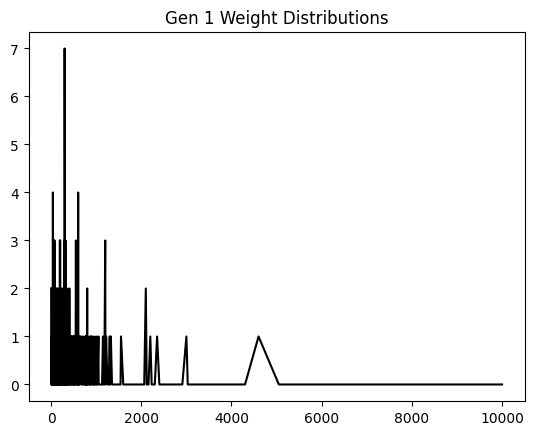

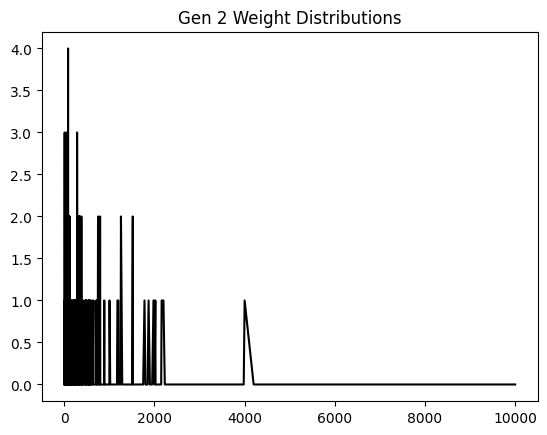

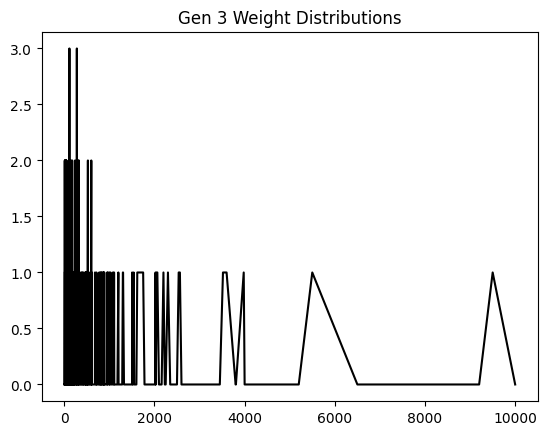

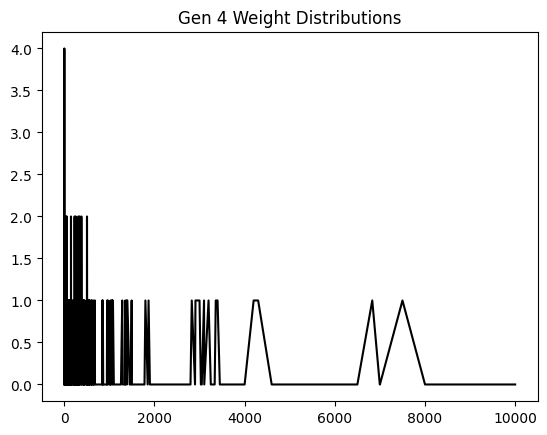

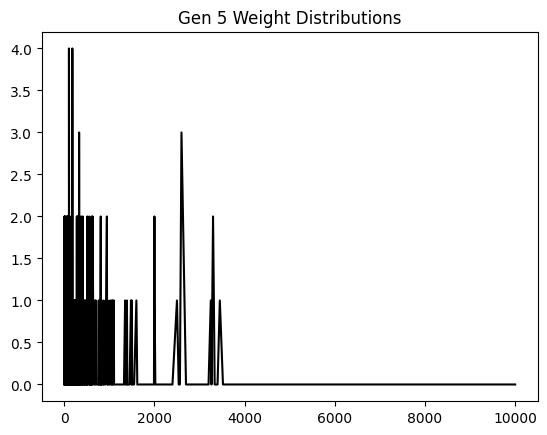

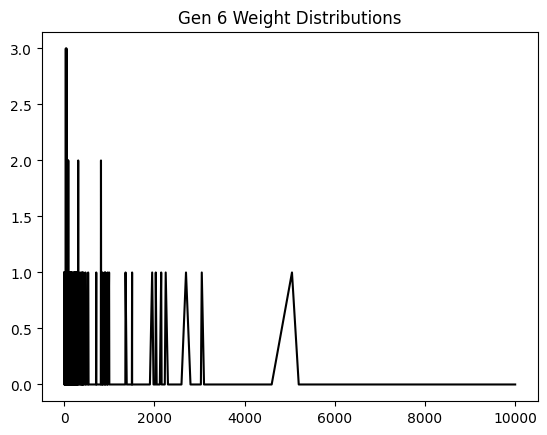

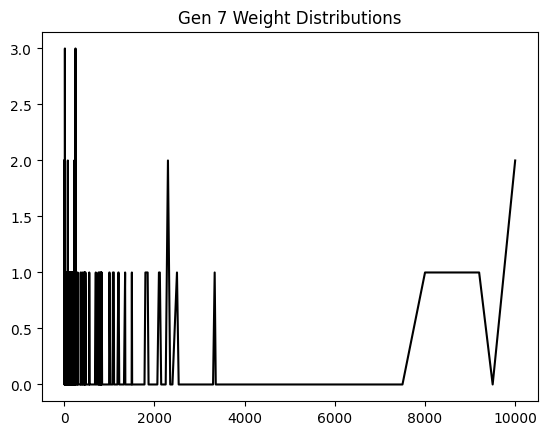

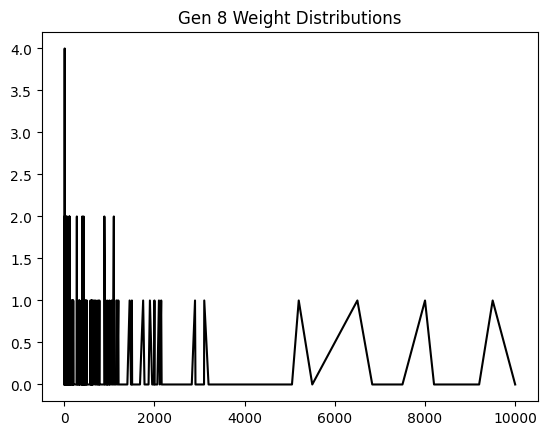

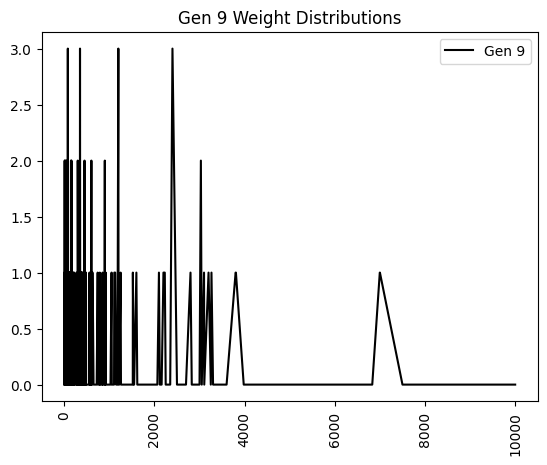

In [6]:
import lets_do_some_analysis as ldsa

ldsa.weight_distros()

Cool- it looks like some of the generations are certainly different than others... but let's see if we can put some facts behind that assumption.  I'm going to switch a bit into proper statics mode and form a null and alternative hypothesis around the weights of the Pokemon across generations.

### Null Hypothesis
The weight distribution of Pokemon in Generation X is the same as Generation 1.

### Alternative Hypothesis
The weight distribution of Pokemon in Generation X is not the same as Generation 1.

Let's see what we can find by comparing each of the generations back to Generation 1 to see how they stack up in a T-Test.

In [7]:
import lets_do_some_analysis as ldsa

ldsa.weight_ttest_checks()


    SELECT
    pm.pokemon_weight
  FROM `rahman-portfolio.pokedex.pokemon_generations`  as pg
  inner join `rahman-portfolio.pokedex.pokemon_base_metadata` as pm
    on pm.pokemon_id between pg.start_pokemon_num and pg.ending_pokemon_num
  where pg.generation_name = 'Generation 1'

T-Test Results:
Generation 1 Weights to Generation 2:
   TtestResult(statistic=-0.3957878698985079, pvalue=0.6926004326221282, df=249.0)
Generation 1 Weights to Generation 3:
   TtestResult(statistic=-1.9865700728384565, pvalue=0.047930933091248615, df=284.0)
Generation 1 Weights to Generation 4:
   TtestResult(statistic=-2.5911016066542425, pvalue=0.01011587621219651, df=256.0)
Generation 1 Weights to Generation 5:
   TtestResult(statistic=-0.867285024540012, pvalue=0.38646767536697946, df=305.0)
Generation 1 Weights to Generation 6:
   TtestResult(statistic=-0.5494102790893672, pvalue=0.5832786494941902, df=221.0)
Generation 1 Weights to Generation 7:
   TtestResult(statistic=-3.2585266784802767, pvalue=0

In a T-Test, if the p-value comes back less than .05, the results are said to be signifigant and there is evidence to reject the null hypothesis.  In the case of our study above, it looks like we can make the following statements on our null and alternative hypothesis for these generation combinations.

### Generation 1 to Generation 2
Insufficent evidence to reject the null hypothesis.

### Generation 1 to Generation 3
We can reject the null hypothesis.

### Generation 1 to Generation 4
We can reject the null hypothesis.

### Generation 1 to Generation 5
Insufficent evidence to reject the null hypothesis.

### Generation 1 to Generation 6
Insufficent evidence to reject the null hypothesis.

### Generation 1 to Generation 7
We can reject the null hypothesis.

### Generation 1 to Generation 8
We can reject the null hypothesis.

### Generation 1 to Generation 9
We can reject the null hypothesis.

### Conculsion on Pokemon Weights
It seems we could offer that Generation 2, 5, and 6 featured similar weight distributions to Generation 1 while Generations 3, 4, 7, 8, and 9 had different distributions.  From indications of the average weights of Pokeomon in these later generations, it seems the Pokemon were heavier.

So they were heavier... were they also taller?

In [8]:
import lets_do_some_analysis as ldsa
ldsa.height_distro_check()


select
    pg.generation_name,
    round(avg(pm.pokemon_height),3) as avg_ht,
    min(pm.pokemon_height) as min_ht,
    max(pm.pokemon_height) as max_ht
FROM `rahman-portfolio.pokedex.pokemon_generations`  as pg
left join `rahman-portfolio.pokedex.pokemon_base_metadata` as pm
  on pm.pokemon_id between pg.start_pokemon_num and pg.ending_pokemon_num
group by
    pg.generation_name
order by
    pg.generation_name



,generation_name,avg_ht,min_ht,max_ht
0,Generation 1,11.947,2,88
1,Generation 2,11.630,2,92
2,Generation 3,12.296,2,145
3,Generation 4,11.336,2,54
4,Generation 5,10.321,1,33
5,Generation 6,10.681,1,58
6,Generation 7,13.511,1,92
7,Generation 8,14.437,1,200
8,Generation 9,13.362,2,120


Query is quite long, please check it out in the utilities/sql_queries.py file under the name generation_height_distros.


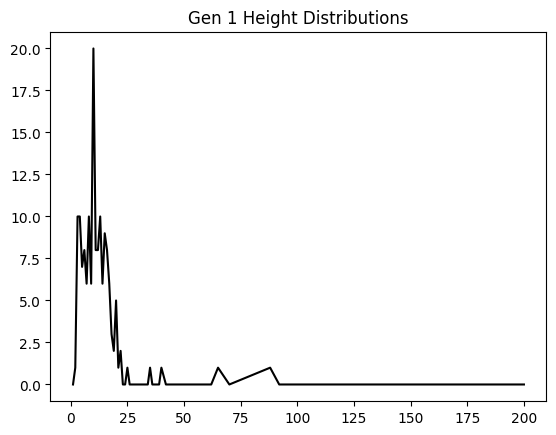

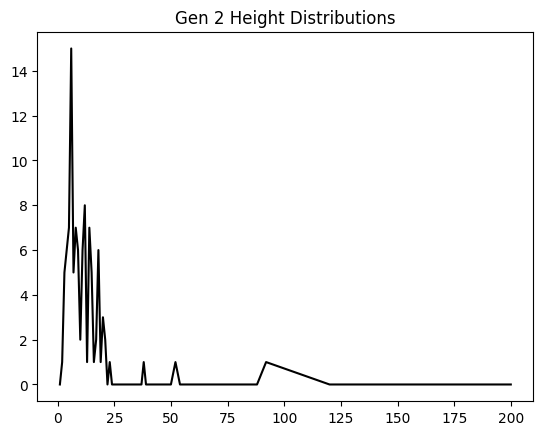

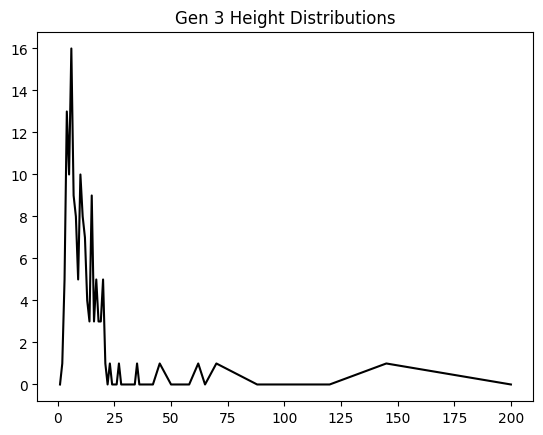

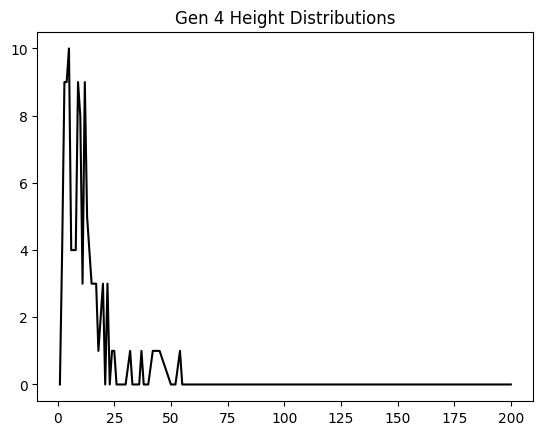

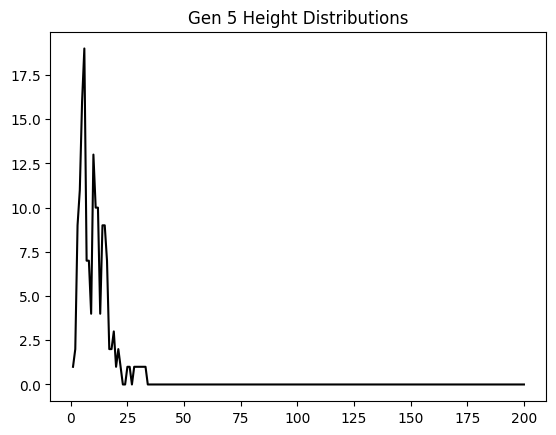

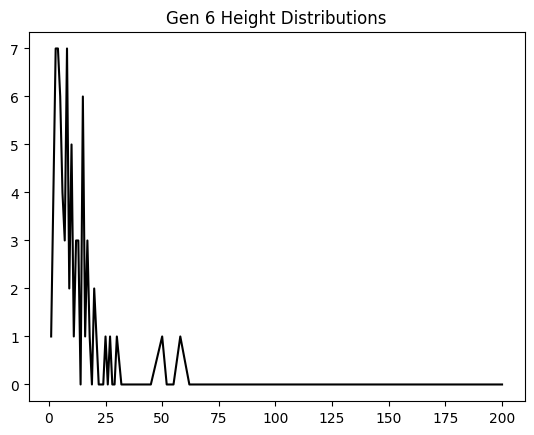

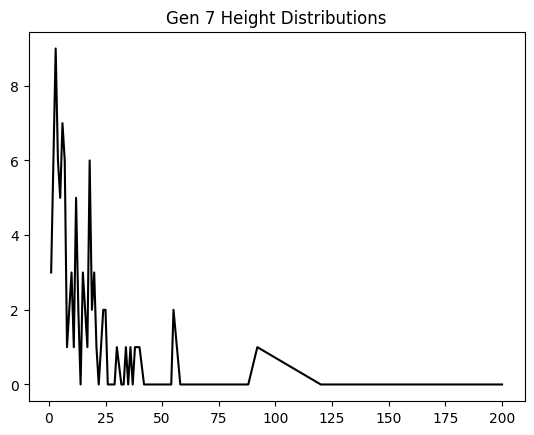

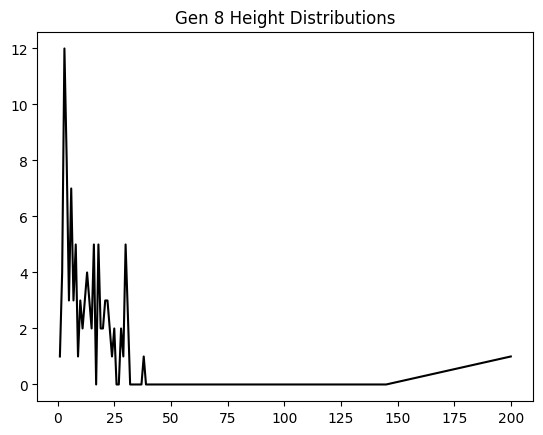

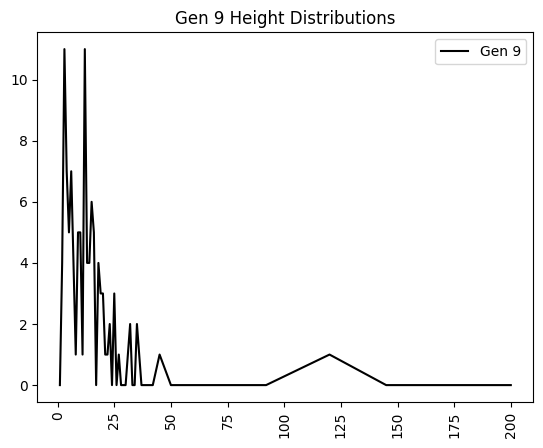

In [9]:
import lets_do_some_analysis as ldsa
ldsa.height_distros()

In [10]:
import lets_do_some_analysis as ldsa
ldsa.height_ttest_checks()
ldsa.height_distro_check()


    SELECT
    pm.pokemon_height
  FROM `rahman-portfolio.pokedex.pokemon_generations`  as pg
  inner join `rahman-portfolio.pokedex.pokemon_base_metadata` as pm
    on pm.pokemon_id between pg.start_pokemon_num and pg.ending_pokemon_num
  where pg.generation_name = 'Generation 1'

T-Test Results:
Generation 1 Heights to Generation 2:
   TtestResult(statistic=0.2428884757087642, pvalue=0.8082917528486813, df=249.0)
Generation 1 Heights to Generation 3:
   TtestResult(statistic=-0.23914475302280325, pvalue=0.811165827615066, df=284.0)
Generation 1 Heights to Generation 4:
   TtestResult(statistic=0.5170066895365107, pvalue=0.605597868574762, df=256.0)
Generation 1 Heights to Generation 5:
   TtestResult(statistic=1.7607727531119022, pvalue=0.07927900378835366, df=305.0)
Generation 1 Heights to Generation 6:
   TtestResult(statistic=0.9149166514418049, pvalue=0.3612325513915722, df=221.0)
Generation 1 Heights to Generation 7:
   TtestResult(statistic=-1.0108151117391517, pvalue=0.313135

,generation_name,avg_ht,min_ht,max_ht
0,Generation 1,11.947,2,88
1,Generation 2,11.630,2,92
2,Generation 3,12.296,2,145
3,Generation 4,11.336,2,54
4,Generation 5,10.321,1,33
5,Generation 6,10.681,1,58
6,Generation 7,13.511,1,92
7,Generation 8,14.437,1,200
8,Generation 9,13.362,2,120


In a T-Test, if the p-value comes back less than .05, the results are said to be signifigant and there is evidence to reject the null hypothesis.  In the case of our study above, it looks like we can make the following statements on our null and alternative hypothesis for these generation combinations.

### Generation 1 to Generation 2
Insufficent evidence to reject the null hypothesis.

### Generation 1 to Generation 3
Insufficent evidence to reject the null hypothesis.

### Generation 1 to Generation 4
Insufficent evidence to reject the null hypothesis.

### Generation 1 to Generation 5
We can reject the null hypothesis

### Generation 1 to Generation 6
We can reject the null hypothesis

### Generation 1 to Generation 7
We can reject the null hypothesis.

### Generation 1 to Generation 8
We can reject the null hypothesis.

### Generation 1 to Generation 9
We can reject the null hypothesis.

### Conculsion on Pokemon Heights
Looking at the results here, although we saw a bit of a flux in the comparisions of Generations moving forward in time when comparing Pokemon weight, Generation 5 and onward are variant enough from Generation 1 to say the distribution of Pokemon heights were not the same.  When looking at the overall aggregate numbers, it seems that Pokemon in Generations 5 and 6 were of smaller stature than Generation 1 while Generations 7, 8, and 9 were taller.

## Thoughts on Findings
Looking at the results we have so far the research seems to indicate Pokemon were heavier in Generations 3, 4, 7, 8, and 9 comapred to Generation 1 and Pokemon were taller in Generations 7,8, and 9.  Looking away from the data for a moment and to the adventures of Ash and friends these generations took place in the following locations:

Generation 7 - Alola Region
Generation 8 - Galar Region
Generation 9 - Paldea Region

I will admit, I am not as familiar with the adventures in the Alola or Paldea Regions, however, I do know that Generation 8 introduced the concept of Dynamax and Gigantamax Pokemon.  Super-sized versions of Pokemon created by feeding a Pokemon in a Dynamax state a Max Soup.  Thematically this makes sense for the larger Pokemon trend we are seeing and I would venture it is safe to say that from a Pokemon design perspective Pokemon were heavier and taller in Generations 7, 8, and 9 than their predicesors in Generation 1.  The question will be if this trend will continue.